In [1]:
from qutip import *
from SingleGate import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Parameters
N = 10
hbar = 1.0

# Particle
charge = 1.0
mass = 1.0
gfac = 1.0
gyro_ratio = gfac*(charge/(2*mass))

In [4]:
z = np.array([-1, 0, 0])
psi = qubit(direction(z))

In [5]:
Hadamard = SingleGate(hbar,gyro_ratio,B=[1,0,1],amp=[1,1,1])
PauliZ = SingleGate(hbar,gyro_ratio,B=[1,0,0],amp=[1,1,1])

In [6]:
res1, time1, n1 = Hadamard.pulse(2,psi)
res2, time2, n2 = PauliZ.pulse(3.2,res1.states[-1])
res, time, n = Hadamard.pulse(1.5,res2.states[-1])

In [7]:
theta, phi = qvec(res.states[:])

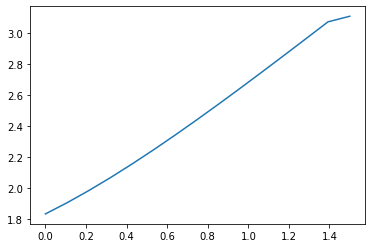

In [8]:
plt.plot(time,theta)

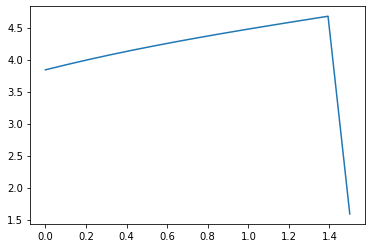

In [9]:
plt.plot(time,phi)

In [10]:
result = probe(res, 3.2, 3.2, n2)

In [11]:
print(qvec([result]))

(array([3.10593161]), array([1.58862979]))


In [12]:
bins, error = Hadamard.measure(result,1000,1,0)

In [15]:
print(error)

0.001


(array([  1.,   0., 999.]),
 array([0. , 0.1, 0.9, 1. ]),
 <a list of 3 Patch objects>)

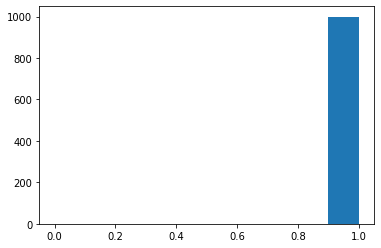

In [13]:
plt.hist(bins,bins=[0,0.1,0.9,1])

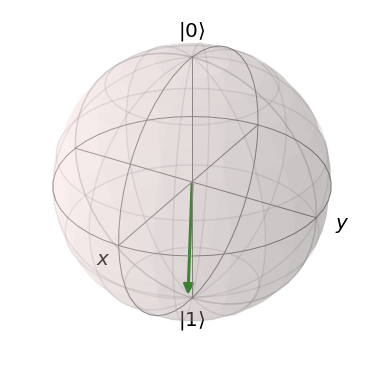

In [14]:
# Bloch Sphere 
bloch = Bloch()
bloch.add_states(result)
bloch.show()